### Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [2]:
# Read the NBA play by play data into a DataFrame
df_23 = pd.read_csv('data/pbp2023.csv')
df_all = pd.read_csv('data/pbpALL.csv')

### Player Points

In [3]:
# Function to calculate points scored by each player in a given game
def points_scored_in_game(game_id):
    # Filter data for the given game_id
    game_df = df_23[df_23['gameid'] == game_id]

    # Initialize dictionaries to store points scored by each player
    player_points = {}
    
    # Initialize variables to keep track of running points for home and away teams
    running_h_pts = 0
    running_a_pts = 0
    
    # Iterate through each row in the filtered DataFrame
    for index, row in game_df.iterrows():
        # Get home and away points for the current row
        h_pts = row['h_pts']
        a_pts = row['a_pts']

        if pd.notna(h_pts) and pd.notna(a_pts) and pd.notnull(a_pts) and pd.notnull(h_pts):
            # Calculate points scored by each team in the current row
            points_scored_home = h_pts - running_h_pts
            points_scored_away = a_pts - running_a_pts
            
            # Update running points for home and away teams
            running_h_pts = h_pts
            running_a_pts = a_pts
        
            # Get player name and player id
            player_name = row['player']
            player_id = row['playerid']
            
            # Determine which team scored points
            if points_scored_home > 0:
                points_scored = points_scored_home
            elif points_scored_away > 0:
                points_scored = points_scored_away
            else:
                continue
                
            # Update points scored by the player
            if player_id in player_points:
                player_points[player_id]['points'] += points_scored
            else:
                player_points[player_id] = {'name': player_name, 'points': points_scored}
    return player_points

In [4]:
# Iterate through unique game IDs and calculate points scored by each player for each game
unique_game_ids = df_23['gameid'].unique()
all_player_points = {}

for game_id in unique_game_ids:
    points_scored = points_scored_in_game(game_id)
    all_player_points[game_id] = points_scored

# Print nicely formatted output
for game_id, player_points in all_player_points.items():
    print("Game ID:", game_id)
    for player_id, data in player_points.items():
        print("Player Name:", data['name'], "| Points Scored:", data['points'])
    print("\n")

Game ID: 22200001
Player Name: M. Smart | Points Scored: 14.0
Player Name: T. Harris | Points Scored: 18.0
Player Name: J. Tatum | Points Scored: 35.0
Player Name: J. Embiid | Points Scored: 26.0
Player Name: J. Harden | Points Scored: 35.0
Player Name: T. Maxey | Points Scored: 21.0
Player Name: G. Williams | Points Scored: 15.0
Player Name: J. Brown | Points Scored: 35.0
Player Name: B. Griffin | Points Scored: 1.0
Player Name: M. Brogdon | Points Scored: 16.0
Player Name: D. House Jr. | Points Scored: 1.0
Player Name: D. Melton | Points Scored: 5.0
Player Name: N. Vonleh | Points Scored: 2.0
Player Name: P. Tucker | Points Scored: 6.0
Player Name: A. Horford | Points Scored: 6.0
Player Name: M. Harrell | Points Scored: 2.0
Player Name: D. White | Points Scored: 2.0
Player Name: G. Niang | Points Scored: 3.0


Game ID: 22200002
Player Name: A. Davis | Points Scored: 27.0
Player Name: K. Thompson | Points Scored: 18.0
Player Name: K. Looney | Points Scored: 7.0
Player Name: S. Curry |

In [108]:
# Function to calculate points scored by a specific player in each game
def points_scored_by_player(player_identifier,df,start_year,end_year):
    # Filter the dataframe for the given year range
    df_filtered = df[(df['season'] >= start_year) & (df['season'] <= end_year)]

    # Sort so that everything is in order
    df_filtered = df_filtered.sort_values(by=['gameid', 'period', 'clock'], ascending=[True, True, False])

    # Drop rows where 'gameid' is equal to '49600063'
    df_filtered = df_filtered[df_filtered['gameid'] != 49600063]

    # Export the sorted DataFrame to a CSV file
    df_filtered.to_csv('sorted_dataframe.csv', index=False)

    # Initialize a dictionary to store points scored by the player in each game
    player_points_by_game = {}

    # Initialize variables to keep track of running points for home and away teams
    running_h_pts = 0
    running_a_pts = 0
    
    # Get the game ID for the first row
    game_id = df_filtered.iloc[0]['gameid']

    # Iterate through each row in the filtered DataFrame
    for index, row in df_filtered.iterrows():
        # Get home and away points for the current row
        h_pts = row['h_pts']
        a_pts = row['a_pts']
        
        # address game change
        if row['gameid'] != game_id:
            running_h_pts = h_pts
            running_a_pts = a_pts
            game_id = row['gameid']

        if pd.notna(h_pts) and pd.notna(a_pts) and pd.notnull(a_pts) and pd.notnull(h_pts) and (h_pts > running_h_pts or a_pts > running_a_pts):
            # Calculate points scored by each team in the current row
            points_scored_home = h_pts - running_h_pts
            points_scored_away = a_pts - running_a_pts
            
            # Update running points for home and away teams
            running_h_pts = h_pts
            running_a_pts = a_pts
        
            # Get player name and player id
            player_name = row['player']
            player_id = row['playerid']

            if player_identifier in (player_name, player_id):
                # Get game id
                game_id = row['gameid']
            
                # Determine which team scored points
                if points_scored_home > 0:
                    points_scored = points_scored_home
                elif points_scored_away > 0:
                    points_scored = points_scored_away
                else:
                    continue
                
                # Update points scored by the player in the corresponding game
                if game_id in player_points_by_game:
                    player_points_by_game[game_id] += points_scored
                else:
                    player_points_by_game[game_id] = points_scored
            
    # Print the points scored by the player in each game
    for game_id, points_scored in player_points_by_game.items():
        print("Game ID:", game_id, "| Points Scored by", player_identifier, ":", points_scored)

    return player_points_by_game

Game ID: 22200001 | Points Scored by J. Tatum : 35.0
Game ID: 22200022 | Points Scored by J. Tatum : 29.0
Game ID: 22200030 | Points Scored by J. Tatum : 40.0
Game ID: 22200047 | Points Scored by J. Tatum : 26.0
Game ID: 22200072 | Points Scored by J. Tatum : 32.0
Game ID: 22200089 | Points Scored by J. Tatum : 23.0
Game ID: 22200107 | Points Scored by J. Tatum : 13.0
Game ID: 22200124 | Points Scored by J. Tatum : 36.0
Game ID: 22200135 | Points Scored by J. Tatum : 26.0
Game ID: 22200152 | Points Scored by J. Tatum : 39.0
Game ID: 22200163 | Points Scored by J. Tatum : 31.0
Game ID: 22200176 | Points Scored by J. Tatum : 34.0
Game ID: 22200186 | Points Scored by J. Tatum : 43.0
Game ID: 22200201 | Points Scored by J. Tatum : 27.0
Game ID: 22200214 | Points Scored by J. Tatum : 19.0
Game ID: 22200231 | Points Scored by J. Tatum : 19.0
Game ID: 22200250 | Points Scored by J. Tatum : 28.0
Game ID: 22200264 | Points Scored by J. Tatum : 37.0
Game ID: 22200275 | Points Scored by J. Tatum 

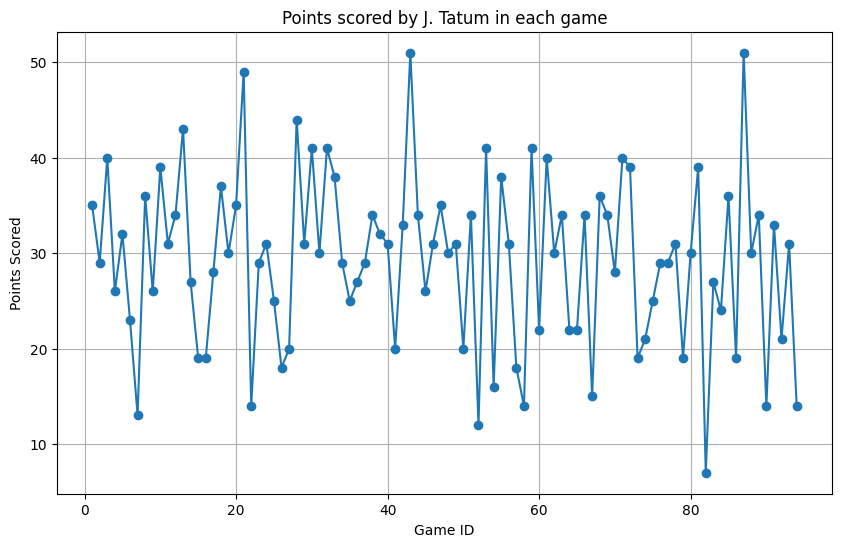

In [109]:
# Example usage:
# Specify the player's name or ID as input
player_identifier = 'J. Tatum'
player_points_by_game = points_scored_by_player(player_identifier,df_23,2023,2023)
extracted = player_points_by_game.items()

# Extract game ids and points scored for plotting
game_ids = list(player_points_by_game.keys())
game_indices = range(1, len(game_ids) + 1)  # Using numerical indices starting from 1
points = list(player_points_by_game.values())

# Plot points scored by the player in each game
plt.figure(figsize=(10, 6))
plt.plot(game_indices, points, marker='o', linestyle='-')
plt.title('Points scored by ' + player_identifier + ' in each game')
plt.xlabel('Game ID')
plt.ylabel('Points Scored')
plt.grid(True)
plt.show()

### Turnover Plots

In [7]:
# Filter to include only turnovers
turnovers_df = df_all[df_all['type'] == 'Turnover']

# Group by team and season, count turnovers
turnovers_count = turnovers_df.groupby(['team', 'season']).size().reset_index(name='turnovers')

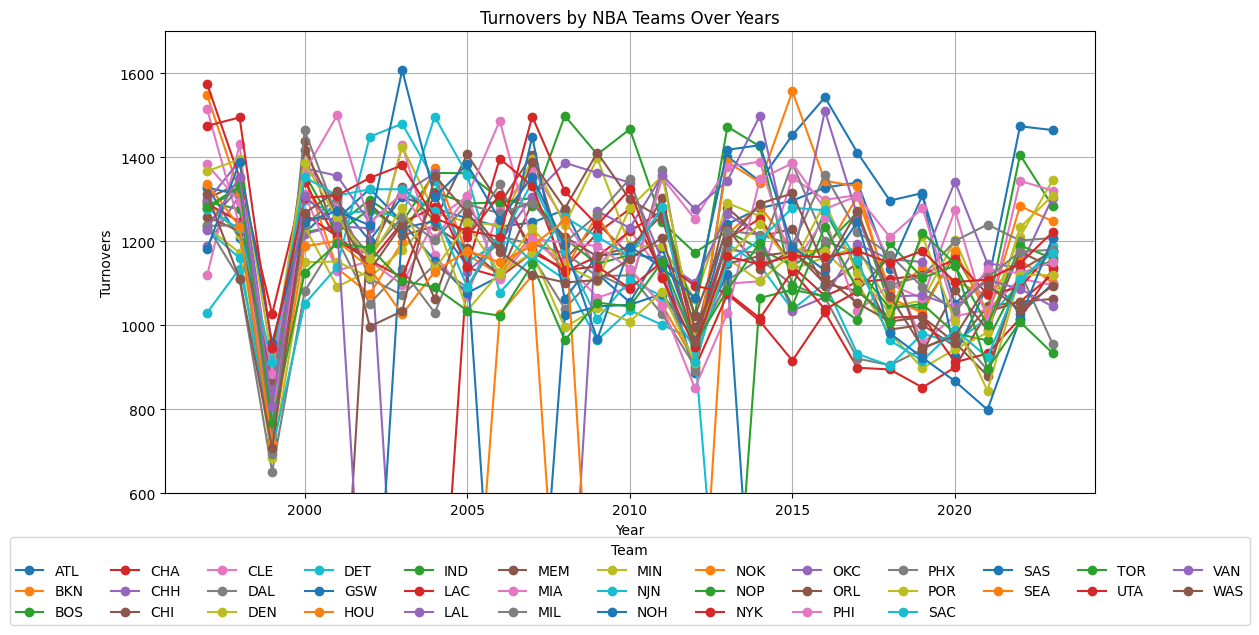

In [8]:
# Pivot the DataFrame for plotting
pivot_table = turnovers_count.pivot(index='season', columns='team', values='turnovers').fillna(0)

pivot_table.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Turnovers by NBA Teams Over Years')
plt.xlabel('Year')
plt.ylabel('Turnovers')
plt.legend(title='Team', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=13)
plt.grid(True)
plt.ylim(600, 1700)
# plt.tight_layout()
plt.show()

   team  avg_turnovers
3   CHA    1045.526316
7   DAL    1071.888889
21  NOK    1072.500000
32  TOR    1085.925926
20  NOH    1100.222222
9   DET    1102.592593
22  NOP    1103.100000
18  MIN    1120.481481
35  WAS    1134.777778
28  POR    1139.555556
31  SEA    1144.916667
23  NYK    1145.592593
15  MEM    1154.227273
17  MIL    1155.037037
4   CHH    1157.500000
19  NJN    1159.937500
25  ORL    1162.555556
13  LAC    1163.481481
29  SAC    1164.333333
1   BKN    1165.090909
6   CLE    1172.296296
5   CHI    1176.333333
30  SAS    1182.962963
34  VAN    1186.800000
27  PHX    1191.185185
0   ATL    1193.666667
12  IND    1193.814815
8   DEN    1194.555556
26  PHI    1204.074074
11  HOU    1207.740741
16  MIA    1210.111111
24  OKC    1221.800000
33  UTA    1226.370370
14  LAL    1228.518519
10  GSW    1237.555556
2   BOS    1238.518519


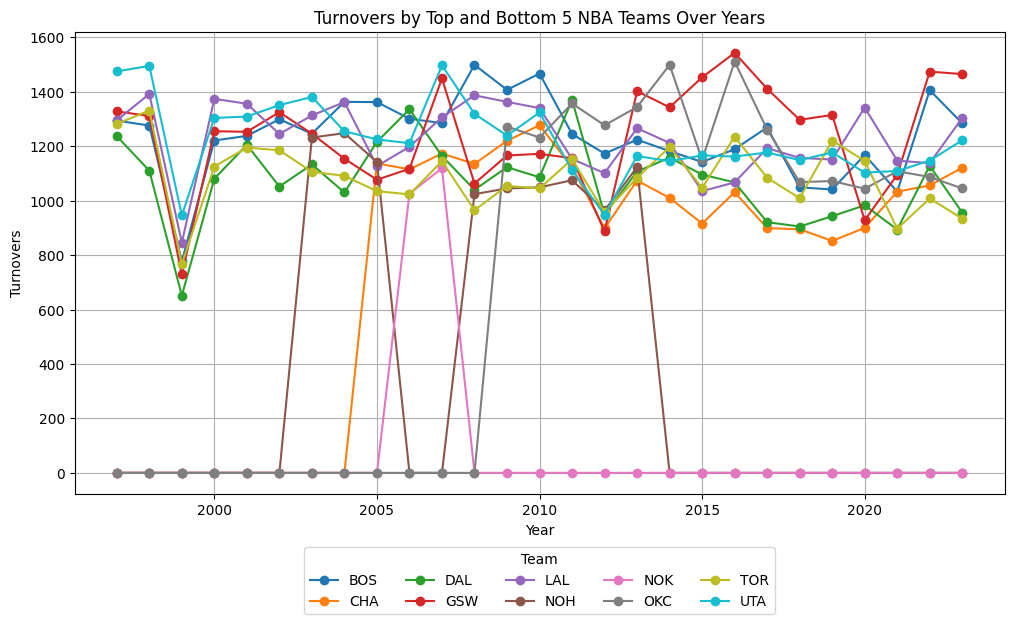

In [9]:
# Calculate average turnovers for each team
avg_turnovers = turnovers_count.groupby('team')['turnovers'].mean().reset_index(name='avg_turnovers')

# Sort teams based on average turnovers
avg_turnovers_sorted = avg_turnovers.sort_values(by='avg_turnovers')
print(avg_turnovers_sorted)

# Select top 5 and bottom 5 teams
top_5_teams = avg_turnovers_sorted.tail(5)
bottom_5_teams = avg_turnovers_sorted.head(5)

# Merge with original turnovers_count to get data for top and bottom 5 teams only
top_bottom_teams = pd.concat([top_5_teams, bottom_5_teams])
filtered_turnovers = pd.merge(turnovers_count, top_bottom_teams['team'], on='team')

# Pivot the DataFrame for plotting
pivot_table = filtered_turnovers.pivot(index='season', columns='team', values='turnovers').fillna(0)

# Plotting
pivot_table.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Turnovers by Top and Bottom 5 NBA Teams Over Years')
plt.xlabel('Year')
plt.ylabel('Turnovers')
plt.legend(title='Team', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.grid(True)
plt.show()

### Made Shot Map

In [10]:
# Filter rows where 'x' and 'y' are not both 0 and 'result' is 'Made'
filtered_df = df_all[(df_all['x'] != 0) & (df_all['y'] != 0) & (df_all['result'] == 'Made')]

# Calculate z-scores for 'x' and 'y'
z_scores_x = np.abs((filtered_df['x'] - filtered_df['x'].mean()) / filtered_df['x'].std())
z_scores_y = np.abs((filtered_df['y'] - filtered_df['y'].mean()) / filtered_df['y'].std())

# Define threshold for outliers (e.g., z-score > 3)
threshold = 3

# Remove rows with outliers
filtered_df = filtered_df[(z_scores_x < threshold) & (z_scores_y < threshold)]

# Extract columns 'x', 'y', and 'year'
selected_columns = ['x', 'y', 'season']
data = filtered_df[selected_columns]

# Sample data points from each year
sampled_data = data.groupby('season').apply(lambda x: x.sample(n=min(100, len(x))))  # Adjust the number of samples as needed

# Convert the DataFrame to a list of tuples
data_tuples = [tuple(x) for x in sampled_data.values]

# Unpack the tuples
x_values, y_values, years = zip(*data_tuples)

# Get unique years
unique_years = sorted(set(years))

# Create a color map
color_map = plt.cm.get_cmap('viridis', len(unique_years))

/var/folders/t7/82t8j2md5xs7x841bn2_94d00000gn/T/ipykernel_49110/3608664263.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('season').apply(lambda x: x.sample(n=min(100, len(x))))  # Adjust the number of samples as needed
/var/folders/t7/82t8j2md5xs7x841bn2_94d00000gn/T/ipykernel_49110/3608664263.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(unique_years))


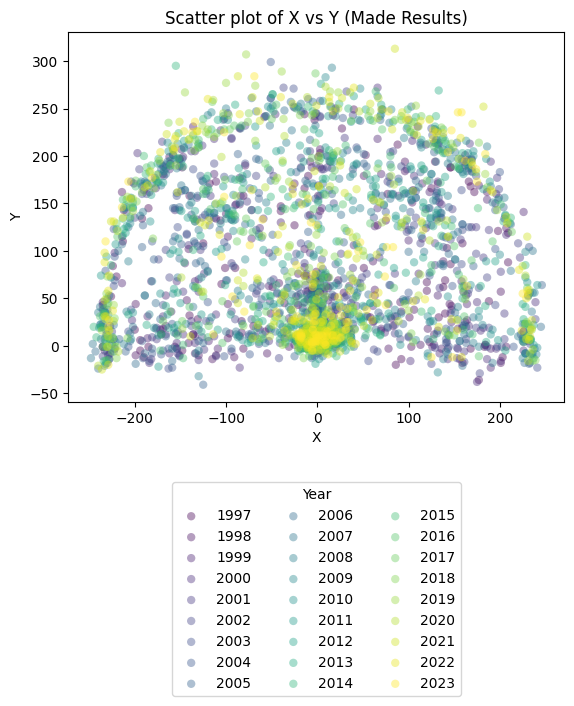

In [11]:
# Plot
fig, ax = plt.subplots()

# for x, y, year in tqdm(zip(x_values, y_values, years)):
#     year_index = unique_years.index(year)
#     ax.scatter(x, y, c=color_map(year_index), marker='o', label=str(year))
for year in unique_years:
    indices = [i for i, y in enumerate(years) if y == year]
    ax.scatter([x_values[i] for i in indices], [y_values[i] for i in indices], color=color_map(unique_years.index(year)), alpha=0.4, edgecolors='none', marker='o', label=str(year))

# Customize plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Scatter plot of X vs Y (Made Results)')

# Move legend under the graph
ax.legend(title='Year', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

plt.show()

### Top N Scoring Players for Select Years

In [115]:

def top_scoring_players(df, start_year, end_year, top_n=5):
    # Filter the dataframe for the given year range
    df_filtered = df[(df['season'] >= start_year) & (df['season'] <= end_year)]

    # Sort so that everything is in order
    df_filtered = df_filtered.sort_values(by=['gameid', 'period', 'clock'], ascending=[True, True, False])

    # Drop rows where 'gameid' is equal to '49600063'
    df_filtered = df_filtered[df_filtered['gameid'] != 49600063]
    
    # Dictionary to hold total points scored by each player
    player_total_points = {}

    running_h_pts = 0
    running_a_pts = 0

    # Get the game ID for the first row
    game_id = df_filtered.iloc[0]['gameid']

    # Iterate through each row in the filtered DataFrame
    for index, row in df_filtered.iterrows():
        player_name = row['player']
        player_id = row['playerid']
        h_pts = row['h_pts']
        a_pts = row['a_pts']

        # address game change
        if row['gameid'] != game_id:
            running_h_pts = h_pts
            running_a_pts = a_pts
            game_id = row['gameid']

        if pd.notna(h_pts) and pd.notna(a_pts) and pd.notnull(a_pts) and pd.notnull(h_pts) and (h_pts > running_h_pts or a_pts > running_a_pts):
            points_scored_home = h_pts - running_h_pts
            points_scored_away = a_pts - running_a_pts

            running_h_pts = h_pts
            running_a_pts = a_pts

            # Determine which team scored points
            if points_scored_home > 0:
                points_scored = points_scored_home
            elif points_scored_away > 0:
                points_scored = points_scored_away       
            else:
                continue

            if player_id in player_total_points:
                player_total_points[player_id]['points'] += points_scored
            else:
                player_total_points[player_id] = {'name': player_name, 'points': points_scored}
            
                
    # Sort players by total points scored
    sorted_players = sorted(player_total_points.items(), key=lambda item: item[1]['points'], reverse=True)

    print("h points", running_h_pts)
    print("a points", running_a_pts)
    
    # Get top N players
    top_players = sorted_players[:top_n]
    
    for player_id, points in top_players:
        print(f"Player ID: {player_id} | Total Points: {points}")
    
    return top_players

In [116]:
start_year = 1997
end_year = 2023
top_n = 5

top_scoring_players(df_all, start_year, end_year, top_n)

h points 120.0
a points 95.0
Player ID: 2544 | Total Points: {'name': 'L. James', 'points': 46095.0}
Player ID: 977 | Total Points: {'name': 'K. Bryant', 'points': 39283.0}
Player ID: 1717 | Total Points: {'name': 'D. Nowitzki', 'points': 35102.0}
Player ID: 1495 | Total Points: {'name': 'T. Duncan', 'points': 31668.0}
Player ID: 201142 | Total Points: {'name': 'K. Durant', 'points': 31239.0}


[(2544, {'name': 'L. James', 'points': 46095.0}),
 (977, {'name': 'K. Bryant', 'points': 39283.0}),
 (1717, {'name': 'D. Nowitzki', 'points': 35102.0}),
 (1495, {'name': 'T. Duncan', 'points': 31668.0}),
 (201142, {'name': 'K. Durant', 'points': 31239.0})]

### Distribution of Points for Top Players

/var/folders/t7/82t8j2md5xs7x841bn2_94d00000gn/T/ipykernel_49110/932925475.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data_player = data_player.groupby('season').apply(lambda x: x.sample(n=min(100, len(x))))  # Adjust the number of samples as needed
/var/folders/t7/82t8j2md5xs7x841bn2_94d00000gn/T/ipykernel_49110/932925475.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map_player = plt.cm.get_cmap('viridis', len(unique_years_player))


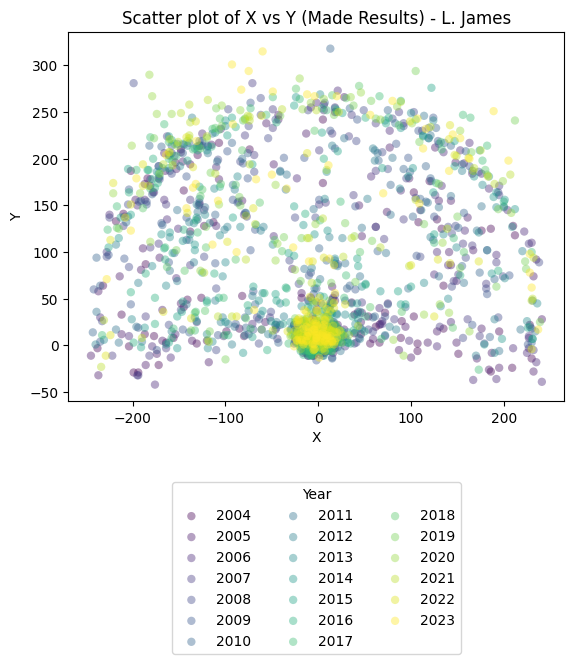

/var/folders/t7/82t8j2md5xs7x841bn2_94d00000gn/T/ipykernel_49110/932925475.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data_player = data_player.groupby('season').apply(lambda x: x.sample(n=min(100, len(x))))  # Adjust the number of samples as needed
/var/folders/t7/82t8j2md5xs7x841bn2_94d00000gn/T/ipykernel_49110/932925475.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map_player = plt.cm.get_cmap('viridis', len(unique_years_player))


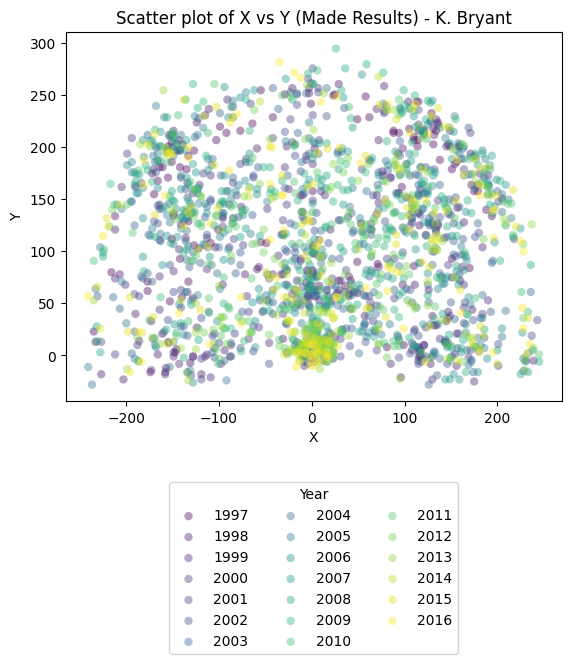

/var/folders/t7/82t8j2md5xs7x841bn2_94d00000gn/T/ipykernel_49110/932925475.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data_player = data_player.groupby('season').apply(lambda x: x.sample(n=min(100, len(x))))  # Adjust the number of samples as needed
/var/folders/t7/82t8j2md5xs7x841bn2_94d00000gn/T/ipykernel_49110/932925475.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map_player = plt.cm.get_cmap('viridis', len(unique_years_player))


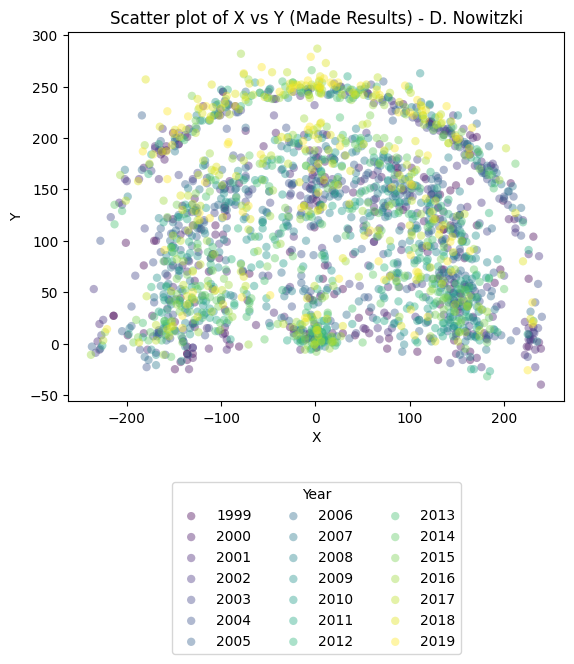

/var/folders/t7/82t8j2md5xs7x841bn2_94d00000gn/T/ipykernel_49110/932925475.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data_player = data_player.groupby('season').apply(lambda x: x.sample(n=min(100, len(x))))  # Adjust the number of samples as needed
/var/folders/t7/82t8j2md5xs7x841bn2_94d00000gn/T/ipykernel_49110/932925475.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map_player = plt.cm.get_cmap('viridis', len(unique_years_player))


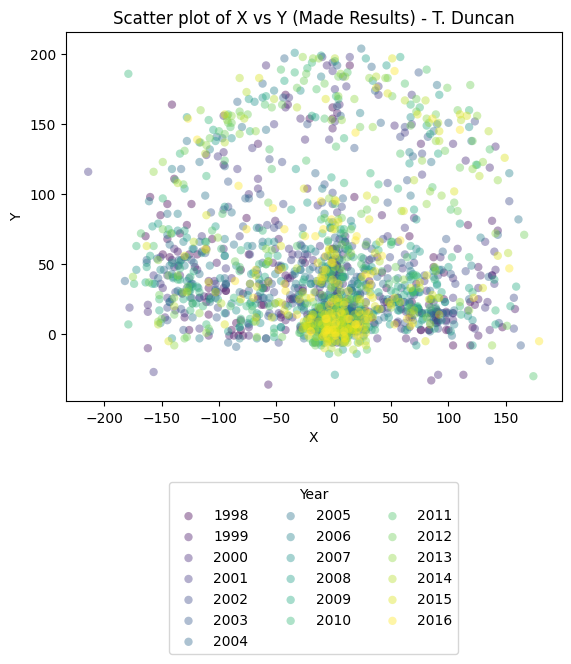

/var/folders/t7/82t8j2md5xs7x841bn2_94d00000gn/T/ipykernel_49110/932925475.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data_player = data_player.groupby('season').apply(lambda x: x.sample(n=min(100, len(x))))  # Adjust the number of samples as needed
/var/folders/t7/82t8j2md5xs7x841bn2_94d00000gn/T/ipykernel_49110/932925475.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map_player = plt.cm.get_cmap('viridis', len(unique_years_player))


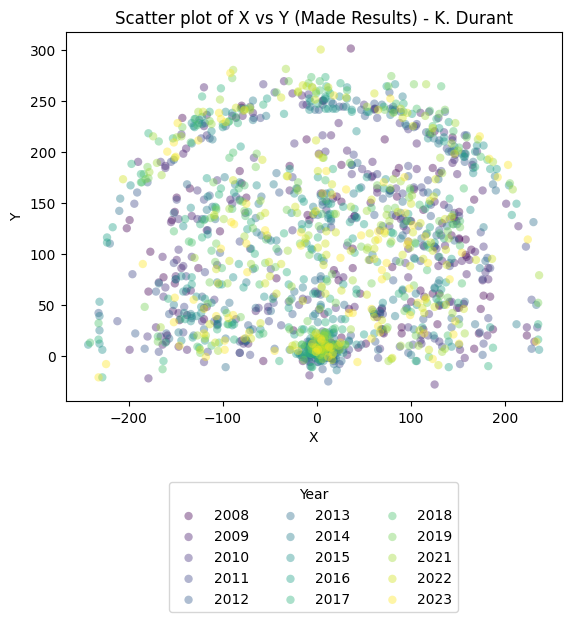

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Define player IDs and corresponding names
player_data = {
    2544: 'L. James',
    977: 'K. Bryant',
    1717: 'D. Nowitzki',
    1495: 'T. Duncan',
    201142: 'K. Durant'
}

# Iterate over player IDs and names
for player_id, player_name in player_data.items():
    # Filter rows for the current player where 'x' and 'y' are not both 0 and 'result' is 'Made'
    filtered_df_player = df_all[(df_all['playerid'] == player_id) & (df_all['x'] != 0) & (df_all['y'] != 0) & (df_all['result'] == 'Made')]

    # Calculate z-scores for 'x' and 'y'
    z_scores_x = np.abs((filtered_df_player['x'] - filtered_df_player['x'].mean()) / filtered_df_player['x'].std())
    z_scores_y = np.abs((filtered_df_player['y'] - filtered_df_player['y'].mean()) / filtered_df_player['y'].std())

    # Define threshold for outliers (e.g., z-score > 3)
    threshold = 3

    # Remove rows with outliers
    filtered_df_player = filtered_df_player[(z_scores_x < threshold) & (z_scores_y < threshold)]

    # Extract columns 'x', 'y', and 'season'
    selected_columns = ['x', 'y', 'season']
    data_player = filtered_df_player[selected_columns]

    # Sample data points from each year
    sampled_data_player = data_player.groupby('season').apply(lambda x: x.sample(n=min(100, len(x))))  # Adjust the number of samples as needed

    # Convert the DataFrame to a list of tuples
    data_tuples_player = [tuple(x) for x in sampled_data_player.values]

    # Unpack the tuples
    x_values_player, y_values_player, years_player = zip(*data_tuples_player)

    # Get unique years
    unique_years_player = sorted(set(years_player))

    # Create a color map
    color_map_player = plt.cm.get_cmap('viridis', len(unique_years_player))

    # Plot
    fig, ax = plt.subplots()

    for year in unique_years_player:
        indices = [i for i, y in enumerate(years_player) if y == year]
        ax.scatter([x_values_player[i] for i in indices], [y_values_player[i] for i in indices], color=color_map_player(unique_years_player.index(year)), alpha=0.4, edgecolors='none', marker='o', label=str(year))

    # Customize plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Scatter plot of X vs Y (Made Results) - {player_name}')

    # Move legend under the graph
    ax.legend(title='Year', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

    plt.show()